In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [51]:
Year_to_separate = 2011
df = pd.read_parquet("dataset.parquet")
Y = df[['Municipal', 'Household', 'Recovered', 'Recicled', 'Compost', 'Disposal', 'Year']]
X = df[[x for x in df.columns if x not in ['Country', 'COU', 'Municipal', 'Household', 'Recovered', 'Recicled', 'Compost', 'Disposal']]]
X_train = X[X.Year < Year_to_separate].copy()
X_test = X[X.Year >= Year_to_separate].copy()
Y_train = Y[X.Year < Year_to_separate].copy()
Y_test = Y[X.Year >= Year_to_separate].copy()
#X_train = pd.read_parquet("Xtime/X_train.parquet")
#X_test = pd.read_parquet("Xtime/X_test.parquet")
#Y_train = pd.read_parquet("Ytime/Y_train.parquet")
#Y_test = pd.read_parquet("Ytime/Y_test.parquet")
X_train.drop(columns={'Year'}, inplace=True)
X_test.drop(columns={'Year'}, inplace=True)

In [52]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))

In [53]:
Y1_train = Y_train[[Y_train.columns[0]]]
Y1_test = Y_test[[Y_test.columns[0]]]
Y2_train = Y_train[[Y_train.columns[1]]]
Y2_test = Y_test[[Y_test.columns[1]]]
Y3_train = Y_train[[Y_train.columns[2]]]
Y3_test = Y_test[[Y_test.columns[2]]]
Y4_train = Y_train[[Y_train.columns[3]]]
Y4_test = Y_test[[Y_test.columns[3]]]
Y5_train = Y_train[[Y_train.columns[4]]]
Y5_test = Y_test[[Y_test.columns[4]]]
Y6_train = Y_train[[Y_train.columns[5]]]
Y6_test = Y_test[[Y_test.columns[5]]]

## Train and score

In [54]:
parameters = {'kernel':['linear', 'rbf'],
              'C':[0.5, 1, 5, 10, 50, 100, 500, 1000],
              'epsilon':[0.1,0.01,0.001]}

In [55]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False, skip=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if skip and i == 46:
            continue
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [56]:
g = GridSearch(svm.SVR(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = svm.SVR(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.03992962837219238 s, score: 0.8721952773141094
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.021960973739624023 s, score: 0.8516253113848571
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.18168020248413086 s, score: 0.9192388988928338
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.05074930191040039 s, score: 0.9564651768566922
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.12633514404296875 s, score: 0.920905717860679
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.09617757797241211 s, score: 0.9521187200815804
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.05019736289978027 s, score: 0.8306013525441084
Probando: {'C': 1, 'epsil

In [8]:
g = GridSearch(svm.SVR(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = svm.SVR(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.0025510787963867188 s, score: 0.9180729741055107
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.0018732547760009766 s, score: -0.2184668057352146
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.002757549285888672 s, score: 0.9798205212316251
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.0026006698608398438 s, score: 0.12160634401920845
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.0038919448852539062 s, score: 0.9870318944690964
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.0024085044860839844 s, score: 0.15234603363638088
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.002451658248901367 s, score: 0.9207754868245652
Probando: 

In [9]:
g = GridSearch(svm.SVR(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = svm.SVR(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.002216339111328125 s, score: 0.6662622250825743
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.001977682113647461 s, score: -0.28031492176285533
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.0035169124603271484 s, score: 0.9169645687310535
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.002391815185546875 s, score: 0.2898155633056909
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.0037147998809814453 s, score: 0.9322486868988278
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.0025358200073242188 s, score: 0.3228795500872004
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.0015347003936767578 s, score: 0.6662622250825743
Probando: {'

In [10]:
g = GridSearch(svm.SVR(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True, skip=True) #Saltar siempre el 46 (tarda demasiado)
clf4 = svm.SVR(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.0028808116912841797 s, score: 0.6875600811694357
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.002416849136352539 s, score: -0.3505766224572065
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.002683877944946289 s, score: 0.935773089802353
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.0021326541900634766 s, score: 0.2754415520634669
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.005400896072387695 s, score: 0.9507036410960982
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.002426624298095703 s, score: 0.32319782185426227
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.0015506744384765625 s, score: 0.6875600811694357
Probando: {'C'

In [11]:
g = GridSearch(svm.SVR(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = svm.SVR(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.0037250518798828125 s, score: 0.7008364749396371
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.002439260482788086 s, score: -0.45187928052227866
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.0031342506408691406 s, score: 0.9146724639801151
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.0022706985473632812 s, score: 0.1407400186140112
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.004764556884765625 s, score: 0.9239726771679508
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.0023293495178222656 s, score: 0.19179336334117758
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.0023708343505859375 s, score: 0.7114797985248157
Probando: 

In [12]:
g = GridSearch(svm.SVR(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = svm.SVR(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.0022821426391601562 s, score: 0.7700836700384626
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.002315998077392578 s, score: -1.1594690929549705
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.0015788078308105469 s, score: 0.923885318281348
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.0013570785522460938 s, score: -0.3380352279600565
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.004039287567138672 s, score: 0.9465325734035631
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.0024700164794921875 s, score: -0.2750981936059145
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.0019791126251220703 s, score: 0.7700836700384626
Probando: {

## Test for each year

In [17]:
np.abs(clf1.predict(X_test.iloc[0::22]) - np.array(Y1_test.iloc[0::22][0])).mean()

0.07570924458734792

In [18]:
np.abs(clf1.predict(X_test.iloc[1::22]) - np.array(Y1_test.iloc[1::22][0])).mean()

0.07658728593775431

In [19]:
np.abs(clf1.predict(X_test.iloc[2::22]) - np.array(Y1_test.iloc[2::22][0])).mean()

0.07775347573775385

In [20]:
np.abs(clf1.predict(X_test.iloc[3::22]) - np.array(Y1_test.iloc[3::22][0])).mean()

0.07907687383852215

In [21]:
np.abs(clf1.predict(X_test.iloc[4::22]) - np.array(Y1_test.iloc[4::22][0])).mean()

0.07584970194874711

In [22]:
np.abs(clf1.predict(X_test.iloc[5::22]) - np.array(Y1_test.iloc[5::22][0])).mean()

0.0770131296490057

In [23]:
np.abs(clf1.predict(X_test.iloc[6::22]) - np.array(Y1_test.iloc[6::22][0])).mean()

0.07778421675254081

In [24]:
np.abs(clf1.predict(X_test.iloc[7::22]) - np.array(Y1_test.iloc[7::22][0])).mean()

0.07903537565852499

In [25]:
np.abs(clf1.predict(X_test.iloc[8::22]) - np.array(Y1_test.iloc[8::22][0])).mean()

0.0829971816024722

In [26]:
np.abs(clf1.predict(X_test.iloc[9::22]) - np.array(Y1_test.iloc[9::22][0])).mean()

0.03769194359902837

In [27]:
np.abs(clf1.predict(X_test.iloc[10::22]) - np.array(Y1_test.iloc[10::22][0])).mean()

0.0366242829702316

## One concrete example

In [17]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[3672.77319889, 2208.74278887, 1349.09237343,  700.2734787 ,
          72.44659093, 2127.19853273, 1992.        ]])

In [18]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[3228.23, 2263.31, 1410.43,  685.92,   96.1 , 1817.8 , 2013.  ]])

## Probamos con España

In [57]:
country = 'ESP'
esp = df[df.COU == country]
Complete = df

### Municipal

In [58]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

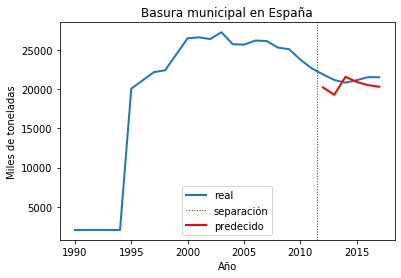

In [59]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

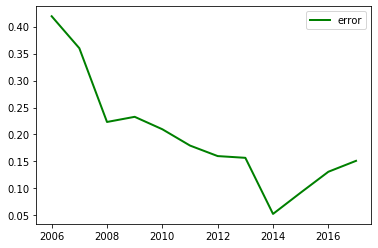

In [49]:
plt.plot([y for y in years if y > Year_to_separate], ((np.array(mun[-12:])-np.array(predictions))/np.array(mun[-12:])), c='green', lw=2, label='error')
plt.legend()
plt.show()

### Household

In [22]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

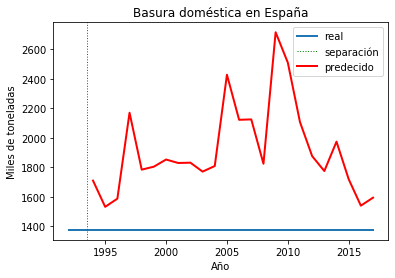

In [23]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [24]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

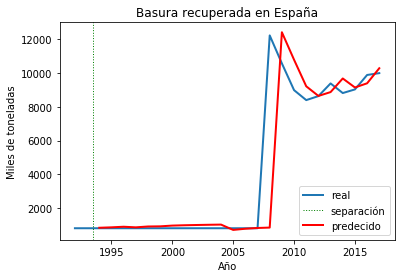

In [25]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [26]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

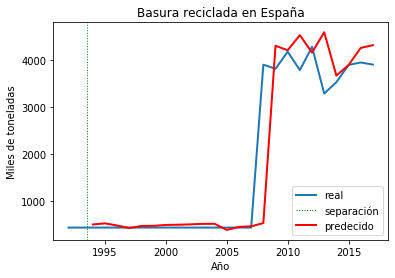

In [27]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [28]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

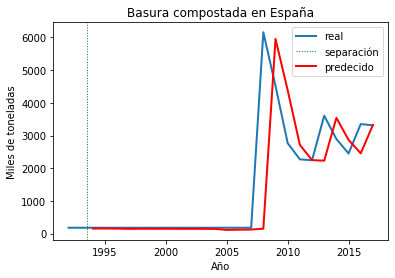

In [29]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [30]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[Year_to_separate-2017:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

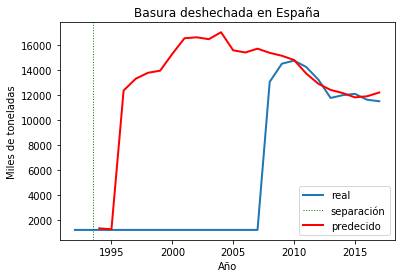

In [31]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=Year_to_separate + 0.5, c='green', lw=1, ls=':', label='separación')
plt.plot([y for y in years if y > Year_to_separate], predictions, c='red', lw=2, label='predecido')
plt.title("Basura deshechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()